In [31]:
import random
import numpy as np
import matplotlib.pyplot as plt


In [32]:
def objectiveFunction(x):
    return ((30*x)-x**2)

In [33]:
# CCSA - Using Sine Chaotic Map 


# 1. Set the initial values of M , fl and ap and tMax
M = 3
ap = [0.1 for i in range(M)]
fl = [2 for i in range(M)]
tMax = 4

# 2. Initialize the crow position (y) randomly , position of hiding place in memory (N)  randomly alongwith R for each crow
yt = [5,25,11] #search space [0-40]
Ct = [0.2,0.2,0.5] 
Nt = [10,18,14]
ytplus1 = []
Ntplus1=[]
Ctplus1=[]
Fn=[]



In [34]:
N=[]
# 3. Evaluate the fitness function of each crow Fn(y). 
for i in range(M):
    Fn.append(objectiveFunction(yt[i]))

# 4. Set t = 1 and run till tMax .
t = 1
while t<=tMax:
    for j in range(M):
        # Randomly choose one of crows to follow  
        z = random.randint(0, M-1)
        if (Ct[z] > ap[z]):
            ytplus1.append(yt[j] + Ct[j] * fl[j] * (Nt[z] - yt[j]))
        else:
            ytplus1.append(random.randint(0, 40))
    # Check Feasibility
    for i in range(M):
        if(ytplus1[i]>=0 and ytplus1[i]<=40):   
            pass
        else:
            ytplus1[i]=yt[i]
    # Updating Each Crow's Memory
    for i in range(M):
        if(objectiveFunction(ytplus1[i])<objectiveFunction(Nt[i])):
            Ntplus1.append(Nt[i])
        else:
            Ntplus1.append(ytplus1[i])
    # Evaluate new position of crow n
    for i in range(M):
        Ctplus1.append(np.sin(np.pi*Ct[i]))

    Ct = Ctplus1
    yt = ytplus1
    Nt = Ntplus1
    Ctplus1 = []
    ytplus1 = []
    Ntplus1 = []
    print("N after iteration no.",t," ",Nt)
    N.append(Nt)
    t=t+1
print("Final optimal N for each crow :")
print(Nt)
plt.show()

N after iteration no. 1   [10.2, 18, 14]
N after iteration no. 2   [14.667167917422795, 18, 14]
N after iteration no. 3   [14.667167917422795, 18, 14]
N after iteration no. 4   [14.667167917422795, 18, 14]
Final optimal N for each crow :
[14.667167917422795, 18, 14]


In [35]:
N

[[10.2, 18, 14],
 [14.667167917422795, 18, 14],
 [14.667167917422795, 18, 14],
 [14.667167917422795, 18, 14]]

In [36]:
c1=[]
c2=[]
c3=[]
for i in range(len(N)):
  c1.append(N[i][0])
  c2.append(N[i][1])
  c3.append(N[i][2])


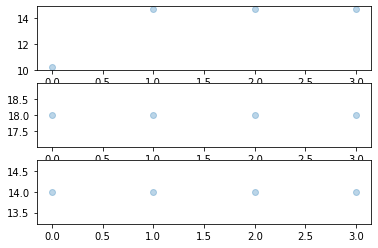

<Figure size 1296x1080 with 0 Axes>

In [37]:
x=[i for i in range(M+1)]
for i in range(M):
  if(i==0):
    y=c1
  if(i==1):
    y=c2
  if(i==2):
    y=c3
  plt.subplot(3, 1, i+1)
  plt.scatter(x,y , label=i,alpha=0.3,)
plt.show()
plt.gcf().set_size_inches(18,15)